In [36]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import Analysis
data = pd.read_csv('Video_Games.csv')
data.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


1. Exploration des données

~Comprendre les données 
~Développer une stratégie 

a. Analyse de Forme
- Variable target : Global Sales
- Lignes et Colonnes : 16719 Lignes et 16 Colonnes
- Types de Variables : 6 Données qualitatives et 10 quantitatives
- Analyse des Valeurs Manquantes

In [3]:
#Variable target
df = data.copy()
# Lignes et Colonnes
df.shape

(16719, 16)

In [4]:
#Types de Variables
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [5]:
df["User_Score"] = pd.to_numeric(df["User_Score"], errors='coerce')
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [6]:
df.dtypes.value_counts()

float64    10
object      6
Name: count, dtype: int64

<Axes: >

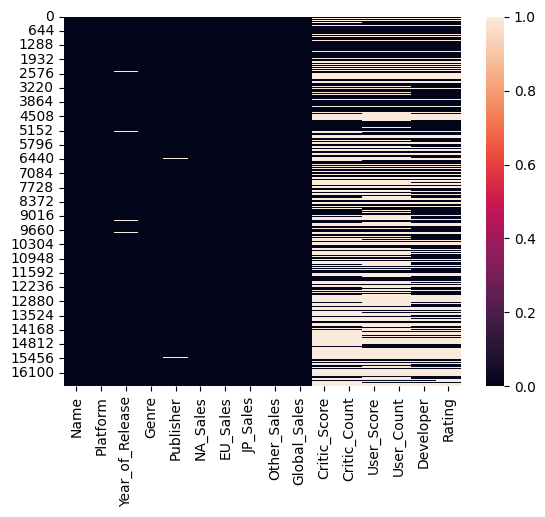

In [7]:
#Analyse des Valeurs Manquantes
#Headmap des valeurs manquantes
sns.heatmap(df.isna())

<Axes: >

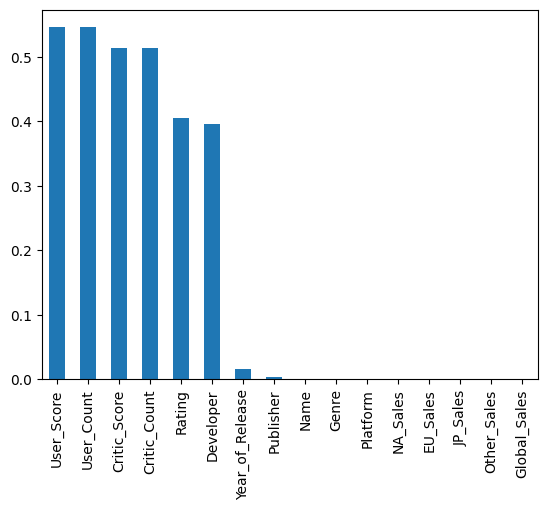

In [8]:
#Total des valeurs manquantes par ordre decroissant en pourcentage
(df.isna().sum()/df.shape[0]).sort_values(ascending=False).plot.bar()

<Axes: title={'center': 'Missing Values'}>

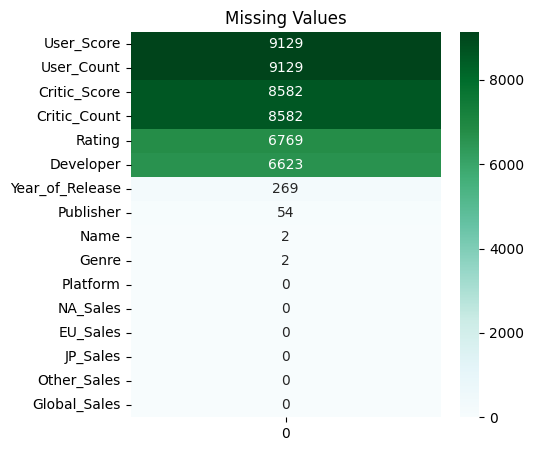

In [9]:
#Valeurs nulles
fig, ax = plt.subplots(figsize=(5,5)) 
plt.title('Missing Values')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='BuGn')

In [10]:
#Duplicate values
df.duplicated().sum()
# No  duplicates row 

0

In [11]:
#Valeurs anormales
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [12]:
#Variables Catégoriques
df.describe(include='O')

,Name,Platform,Genre,Publisher,Developer,Rating
count,16717,16719,16717,16665,10096,9950
unique,11562,31,12,581,1696,8
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,Ubisoft,E
freq,12,2161,3370,1356,204,3991


b. Analyse de Fond
- Visualisation de la target
- Signification des Variables
- Relation Variables / Target

In [ ]:
#Visualisation de la Target

<Figure size 640x480 with 0 Axes>

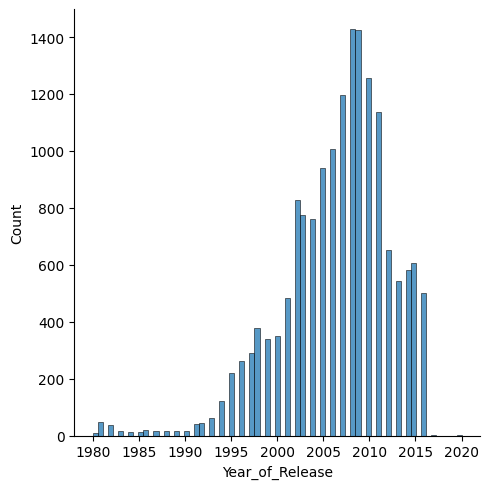

<Figure size 640x480 with 0 Axes>

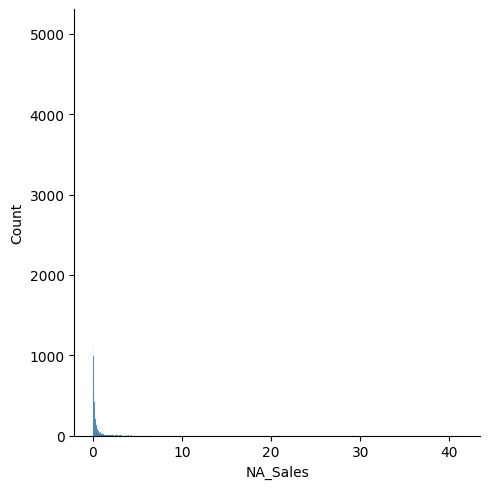

<Figure size 640x480 with 0 Axes>

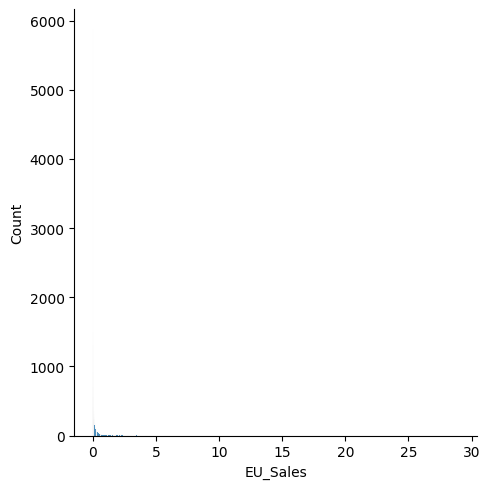

<Figure size 640x480 with 0 Axes>

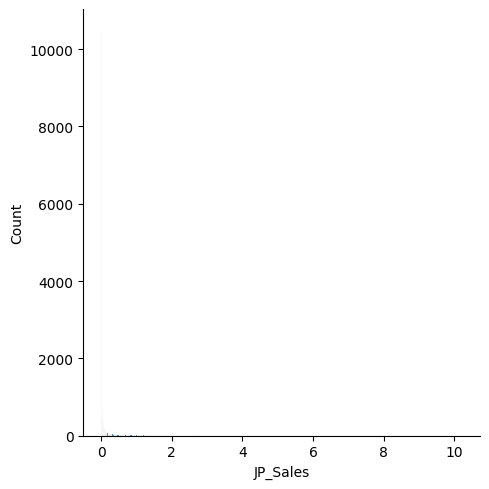

<Figure size 640x480 with 0 Axes>

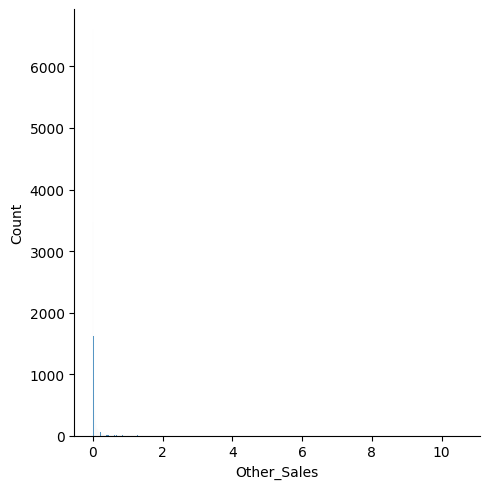

<Figure size 640x480 with 0 Axes>

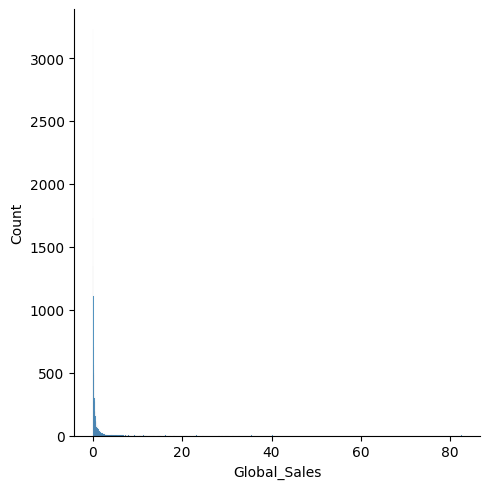

<Figure size 640x480 with 0 Axes>

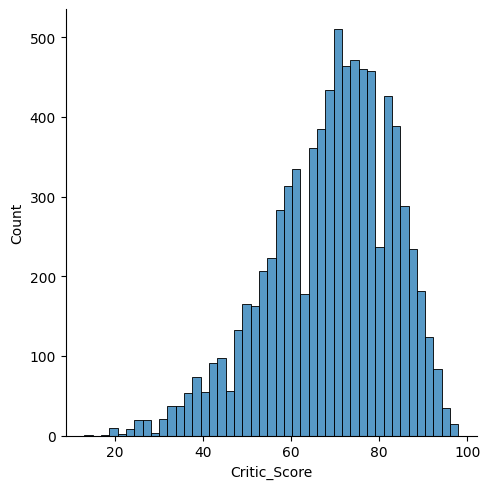

<Figure size 640x480 with 0 Axes>

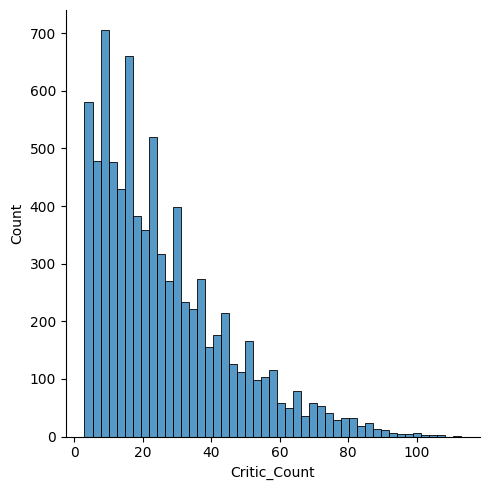

<Figure size 640x480 with 0 Axes>

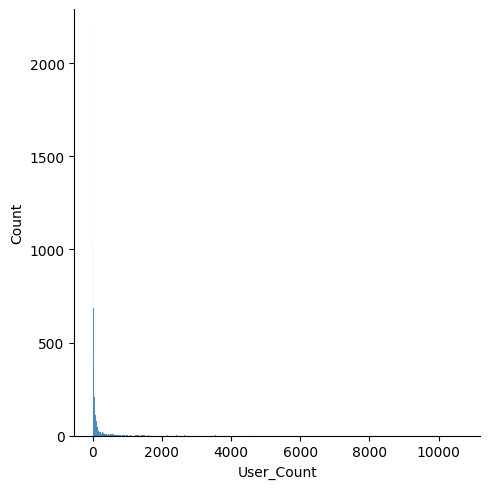

In [21]:
#Signification des variables 
#Histogramme des variables quantitatives
for col in df.select_dtypes('float') :
    plt.figure()
    sns.displot(df[col])

In [24]:
#Histogramme des variables qualitatives
for col in df.select_dtypes('object') :
    print(f'{col :-<50} {df[col].unique()}')

Name---------------------------------------------- ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Platform------------------------------------------ ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Genre--------------------------------------------- ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Publisher----------------------------------------- ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment' 'Square Enix'
 'Sony Computer Entertainment Europe' 'Virgin Interactive' 'LucasArts'

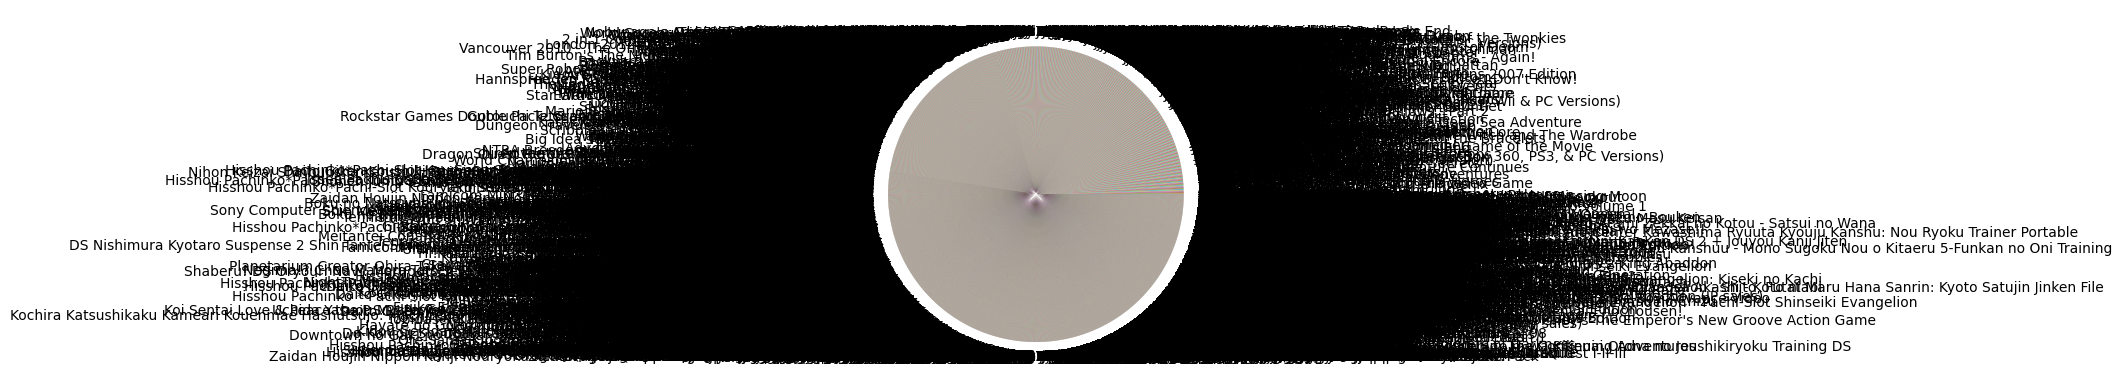

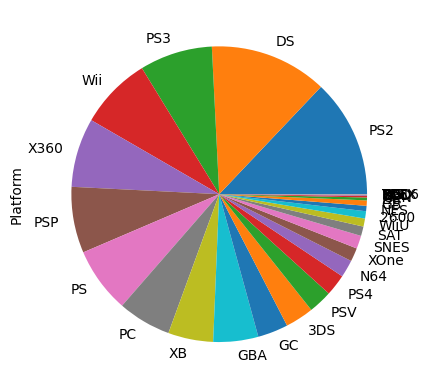

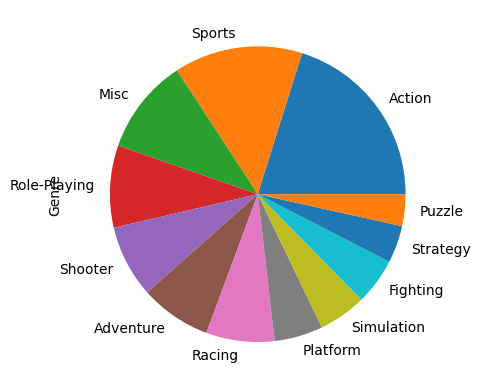

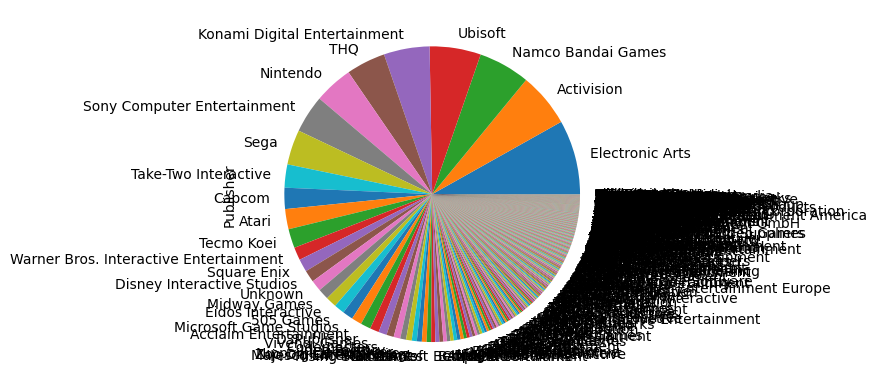

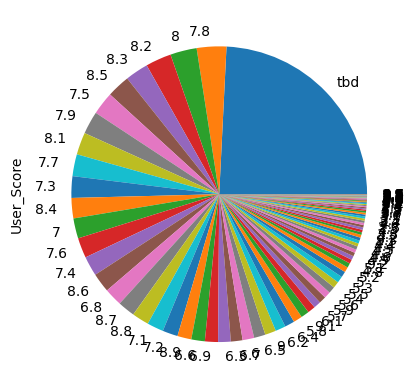

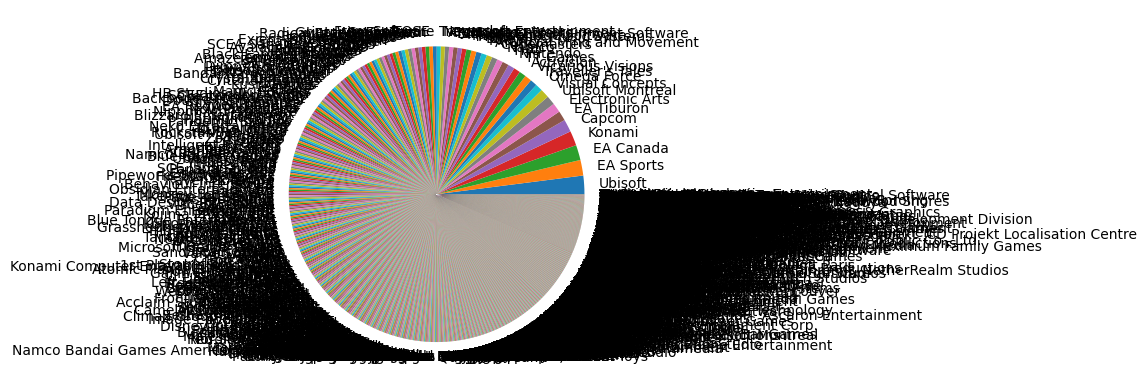

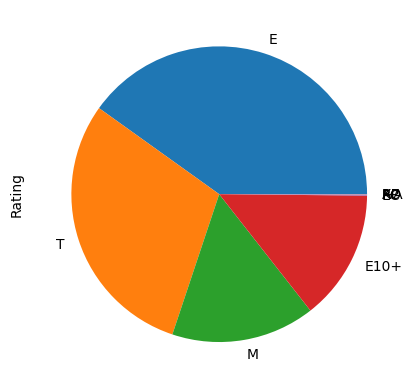

In [25]:
for col in df.select_dtypes('object') :
    plt.figure()
    df[col].value_counts().plot.pie()

Data Wrangling (List of cleaning steps )

In [27]:
#Je divise ma base de données en 2; Dans une base je mets les variables catégoriques et dans l'autre base je mets les variables numériques
cat_data = []
num_data = []

for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:,i])
    else:
        num_data.append(df.iloc[:,i])
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [28]:
#Je vérifie s'il y'a encore les valeurs manquantes dans mes variables catégoriques
#Pour les variables catégoriques, on va remplacer les valeurs manquantes par les valeurs qui se repètent le plus
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [29]:
cat_data

,Name,Platform,Genre,Publisher,Developer,Rating
0,Wii Sports,Wii,Sports,Nintendo,Nintendo,E
1,Super Mario Bros.,NES,Platform,Nintendo,Ubisoft,E
2,Mario Kart Wii,Wii,Racing,Nintendo,Nintendo,E
3,Wii Sports Resort,Wii,Sports,Nintendo,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,Ubisoft,E
...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,Action,Tecmo Koei,Ubisoft,E
16715,LMA Manager 2007,X360,Sports,Codemasters,Ubisoft,E
16716,Haitaka no Psychedelica,PSV,Adventure,Idea Factory,Ubisoft,E
16717,Spirits & Spells,GBA,Platform,Wanadoo,Ubisoft,E


In [30]:
# Vérifier les valeurs manquantes dans chaque colonne
print(num_data.isnull().sum())

Year_of_Release     269
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
dtype: int64


In [41]:
# Remplacer les NaN par la médiane de la colonne
num_data['Critic_Score'] = num_data['Critic_Score'].fillna(num_data['Critic_Score'].median())
num_data['Critic_Count'] = num_data['Critic_Count'].fillna(num_data['Critic_Count'].median())
num_data['User_Score'] = num_data['User_Score'].fillna(num_data['User_Score'].median())
num_data['User_Count'] = num_data['User_Count'].fillna(num_data['User_Count'].median())
num_data['Year_of_Release'] = num_data['Year_of_Release'].fillna(num_data['Year_of_Release'].median())
#Je vérifie s'il y'a encore les valeurs manquantes
num_data.isnull().sum().any()
num_data

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,2006.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0
1,1985.0,29.08,3.58,6.81,0.77,40.24,71.0,21.0,7.5,24.0
2,2008.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0
3,2009.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0
4,1996.0,11.27,8.89,10.22,1.00,31.37,71.0,21.0,7.5,24.0
...,...,...,...,...,...,...,...,...,...,...
16714,2016.0,0.00,0.00,0.01,0.00,0.01,71.0,21.0,7.5,24.0
16715,2006.0,0.00,0.01,0.00,0.00,0.01,71.0,21.0,7.5,24.0
16716,2016.0,0.00,0.00,0.01,0.00,0.01,71.0,21.0,7.5,24.0
16717,2003.0,0.01,0.00,0.00,0.00,0.01,71.0,21.0,7.5,24.0


In [32]:
# La base de données pour AED
df = pd.concat([cat_data,num_data], axis=1)
df

,Name,Platform,Genre,Publisher,Developer,Rating,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,Sports,Nintendo,Nintendo,E,2006.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0
1,Super Mario Bros.,NES,Platform,Nintendo,Ubisoft,E,1985.0,29.08,3.58,6.81,0.77,40.24,71.0,21.0,7.5,24.0
2,Mario Kart Wii,Wii,Racing,Nintendo,Nintendo,E,2008.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0
3,Wii Sports Resort,Wii,Sports,Nintendo,Nintendo,E,2009.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,Ubisoft,E,1996.0,11.27,8.89,10.22,1.00,31.37,71.0,21.0,7.5,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,Action,Tecmo Koei,Ubisoft,E,2016.0,0.00,0.00,0.01,0.00,0.01,71.0,21.0,7.5,24.0
16715,LMA Manager 2007,X360,Sports,Codemasters,Ubisoft,E,2006.0,0.00,0.01,0.00,0.00,0.01,71.0,21.0,7.5,24.0
16716,Haitaka no Psychedelica,PSV,Adventure,Idea Factory,Ubisoft,E,2016.0,0.00,0.00,0.01,0.00,0.01,71.0,21.0,7.5,24.0
16717,Spirits & Spells,GBA,Platform,Wanadoo,Ubisoft,E,2003.0,0.01,0.00,0.00,0.00,0.01,71.0,21.0,7.5,24.0


Pipelines

In [42]:
df.dtypes

Name                object
Platform            object
Genre               object
Publisher           object
Developer           object
Rating              object
Year_of_Release    float64
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
dtype: object

In [47]:
df.drop(columns=['Name', 'Publisher','Year_of_Release','NA_Sales','EU_Sales','JP_Sales', 'Other_Sales', 'Critic_Count','User_Count'], inplace=True)

In [46]:
df

,Platform,Genre,Developer,Rating,Global_Sales,Critic_Score,User_Score
0,Wii,Sports,Nintendo,E,82.53,76.0,8.0
1,NES,Platform,Ubisoft,E,40.24,71.0,7.5
2,Wii,Racing,Nintendo,E,35.52,82.0,8.3
3,Wii,Sports,Nintendo,E,32.77,80.0,8.0
4,GB,Role-Playing,Ubisoft,E,31.37,71.0,7.5
...,...,...,...,...,...,...,...
16714,PS3,Action,Ubisoft,E,0.01,71.0,7.5
16715,X360,Sports,Ubisoft,E,0.01,71.0,7.5
16716,PSV,Adventure,Ubisoft,E,0.01,71.0,7.5
16717,GBA,Platform,Ubisoft,E,0.01,71.0,7.5


In [48]:
# Diviser les données en variables d'entrée et de sortie
X = df.drop('Global_Sales', axis=1)
y = df[['Global_Sales']]

In [49]:
X

,Platform,Genre,Developer,Rating,Critic_Score,User_Score
0,Wii,Sports,Nintendo,E,76.0,8.0
1,NES,Platform,Ubisoft,E,71.0,7.5
2,Wii,Racing,Nintendo,E,82.0,8.3
3,Wii,Sports,Nintendo,E,80.0,8.0
4,GB,Role-Playing,Ubisoft,E,71.0,7.5
...,...,...,...,...,...,...
16714,PS3,Action,Ubisoft,E,71.0,7.5
16715,X360,Sports,Ubisoft,E,71.0,7.5
16716,PSV,Adventure,Ubisoft,E,71.0,7.5
16717,GBA,Platform,Ubisoft,E,71.0,7.5


In [50]:
y

,Global_Sales
0,82.53
1,40.24
2,35.52
3,32.77
4,31.37
...,...
16714,0.01
16715,0.01
16716,0.01
16717,0.01


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(include='float64').columns


In [68]:
import sklearn
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
transformers=ColumnTransformer([('numeric features transform',RobustScaler(),num_cols),('categorical features transform',\
                                  OneHotEncoder(sparse=False,handle_unknown = 'ignore'),cat_cols)])

In [69]:
from xgboost import XGBRegressor

In [74]:
model = XGBRegressor(n_estimators=100, max_depth=4)

In [75]:
pipe_t=Pipeline([('feat transforms',transformers),('Scaling',RobustScaler()), ('Model', model)])
pipe_t

Pipeline(steps=[('feat transforms',
                 ColumnTransformer(transformers=[('numeric features transform',
                                                  RobustScaler(),
                                                  Index(['Critic_Score', 'User_Score'], dtype='object')),
                                                 ('categorical features '
                                                  'transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Platform', 'Genre', 'Developer', 'Rating'], dtype='object'))])),
                ('Scaling', RobustScaler()),
                ('Model...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [76]:
from sklearn.metrics import r2_score

In [77]:
pipe_t.fit(X_train, y_train)

/home/nellyguepnang/Bureau/projets/Video_games_sales-dev/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('feat transforms',
                 ColumnTransformer(transformers=[('numeric features transform',
                                                  RobustScaler(),
                                                  Index(['Critic_Score', 'User_Score'], dtype='object')),
                                                 ('categorical features '
                                                  'transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Platform', 'Genre', 'Developer', 'Rating'], dtype='object'))])),
                ('Scaling', RobustScaler()),
                ('Model...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [79]:
yhat = pipe_t.predict(X_test)

In [80]:
yhat

array([0.578119  , 0.18336172, 0.4183414 , ..., 0.32162148, 0.00221014,
       0.33250815], dtype=float32)

In [83]:
r2_score(y_test,yhat)

0.3792274523589463

In [84]:
import pickle 
filename = 'XGBRegressor-model'
pickle.dump(pipe_t, open(filename, 'wb'))